- Pradeep Gahlawat
- 10524011
- Driver drowsiness detection system
- file 2/4 (Normalization)

In [1]:
# import required libraries
import warnings
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# list of subject numbers present in both class
# Common_subjects = [2, 9, 10, 11, 12, 16, 17, 18, 19, 22, 24, 29, 32, 34, 35, 36, 39, 40, 41, 46, 50, 52, 53, 54, 56, 57, 59]

# Read all alert files and concatenate them into df_alert dataframe
path = r'C:/Users/Pradeep/Downloads/Colab/Data/Alert'
all_alert_files = glob.glob(path + "/*.csv")
column_names = ['EAR', 'MAR', 'CIR', 'MOE', 'PITCH', 'ROLL', 'YAW']

temp = []
for filepath in all_alert_files:
    df = pd.read_csv(filepath, index_col=None, header=None, nrows = 240)
    Subject_number = int(filepath[-6:-4])
    if df.shape[0] == 240:
        df.columns = column_names
        df['Subject'] = int(Subject_number)
        temp.append(df)
    
df_alert = pd.concat(temp, axis=0, join='inner', ignore_index=True)
df_alert['Label'] = 0
print(df_alert.shape)

# Read all drowsy files and concatenate them into df_drowsy dataframe
path = r'C:/Users/Pradeep/Downloads/Colab/Data/Drowsy'
all_drowsy_files = glob.glob(path + "/*.csv")

temp1 = []
for filepath in all_drowsy_files:
    df = pd.read_csv(filepath, index_col=None, header=None, nrows = 240)
    Subject_number = int(filepath[-6:-4])
    if df.shape[0] == 240:
        df.columns = column_names
        df['Subject'] = int(Subject_number)
        temp1.append(df)
    
df_drowsy = pd.concat(temp1, axis=0, join='inner', ignore_index=True)
df_drowsy['Label'] = 1
print(df_drowsy.shape)

(6480, 9)
(6480, 9)


In [3]:
# analyze df_alert
df_alert.describe()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.0
mean,0.303957,1.040315,0.451128,3.507883,-11.350358,-0.292324,1.583531,32.333333,0.0
std,0.051024,0.138671,0.057071,0.721599,5.396723,3.149570,9.416338,16.963140,0.0
min,0.102769,0.396491,0.236443,1.453801,-84.809831,-21.120917,-35.120723,2.000000,0.0
25%,0.268766,0.966920,0.411410,2.998742,-14.782821,-1.862237,-5.090220,17.000000,0.0
50%,0.302291,1.009734,0.447170,3.420086,-10.892913,-0.387182,1.248965,34.000000,0.0
75%,0.342470,1.084710,0.493692,3.813723,-7.575725,1.295315,7.879274,50.000000,0.0
max,0.470341,1.567313,0.636356,11.434405,34.842207,25.532045,33.427154,59.000000,0.0


In [4]:
# analyze df_drowsy
df_drowsy.describe()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.0
mean,0.262956,1.064091,0.411411,4.227877,-8.138030,-0.047372,3.558490,32.333333,1.0
std,0.054638,0.129931,0.055304,1.067992,8.507008,4.639051,9.931154,16.963140,0.0
min,0.088218,0.441261,0.178000,1.765045,-85.246005,-26.270791,-64.260677,2.000000,1.0
25%,0.223601,0.979783,0.373001,3.493200,-13.026784,-2.339298,-3.009269,17.000000,1.0
50%,0.269973,1.047854,0.411610,3.933390,-7.983333,0.103359,3.097460,34.000000,1.0
75%,0.302069,1.117578,0.448569,4.653828,-2.169844,2.344953,8.871614,50.000000,1.0
max,0.549811,2.640000,0.677000,12.200000,36.700000,30.800000,41.070155,59.000000,1.0


In [5]:
# concat both frames
df = pd.concat([df_alert, df_drowsy], axis=0, join='inner', ignore_index=True)

In [6]:
# get first three frames of each subjects alert video
df_alert_1 = df_alert.iloc[0::240, :]
df_alert_2 = df_alert.iloc[1::240, :]
df_alert_3 = df_alert.iloc[2::240, :]

In [7]:
#Merging them into one dataframe
alert_first3 = [df_alert_1,df_alert_2,df_alert_3]
df_alert_first3 = pd.concat(alert_first3)
df_alert_first3 = df_alert_first3.sort_index()

In [8]:
#Based on the first 3 "Alert" frames, calculating respondent-wise mean and std for each feature
df_means = df_alert_first3.groupby("Subject")["EAR","MAR","CIR","MOE"].mean()
df_std = df_alert_first3.groupby("Subject")["EAR","MAR","CIR","MOE"].std()

C:\Users\Pradeep\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Pradeep\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
#Functions for mean and std for each feature
def mean_EAR(respondent):
    return df_means.loc[respondent]["EAR"]

def mean_MAR(respondent):
    return df_means.loc[respondent]["MAR"]

def mean_CIR(respondent):
    return df_means.loc[respondent]["CIR"]

def mean_MOE(respondent):
    return df_means.loc[respondent]["MOE"]


def std_EAR(respondent):
    return df_std.loc[respondent]["EAR"]

def std_MAR(respondent):
    return df_std.loc[respondent]["MAR"]

def std_CIR(respondent):
    return df_std.loc[respondent]["CIR"]

def std_MOE(respondent):
    return df_std.loc[respondent]["MOE"]

In [10]:
#Adding respondent-wise mean and std for each feature to each row in the original dataframe
df["EAR_mean"] = df["Subject"].apply(mean_EAR)
df["MAR_mean"] = df["Subject"].apply(mean_MAR)
df["CIR_mean"] = df["Subject"].apply(mean_CIR)
df["MOE_mean"] = df["Subject"].apply(mean_MOE)

df["EAR_std"] = df["Subject"].apply(std_EAR)
df["MAR_std"] = df["Subject"].apply(std_MAR)
df["CIR_std"] = df["Subject"].apply(std_CIR)
df["MOE_std"] = df["Subject"].apply(std_MOE)

In [11]:
#Calculating normalised features for each row in the original dataframe
df["EAR"] = (df["EAR"]-df["EAR_mean"])/ df["EAR_std"]
df["MAR"] = (df["MAR"]-df["MAR_mean"])/ df["MAR_std"]
df["CIR"] = (df["CIR"]-df["CIR_mean"])/ df["CIR_std"]
df["MOE"] = (df["MOE"]-df["MOE_mean"])/ df["MOE_std"]

In [12]:
# droping unnecessary columns and 
df_split = df.drop(['EAR_mean', 'MAR_mean', 'CIR_mean', 'MOE_mean', 'EAR_std', 'MAR_std', 'CIR_std', 'MOE_std'], axis =1 )
df = df[['EAR', 'MAR', 'CIR', 'MOE', 'Label' ]]

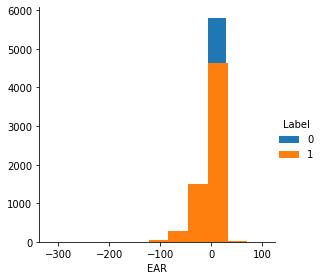

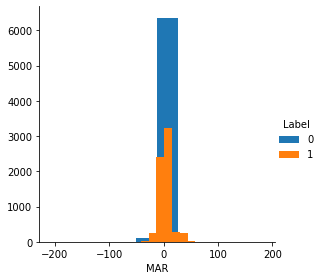

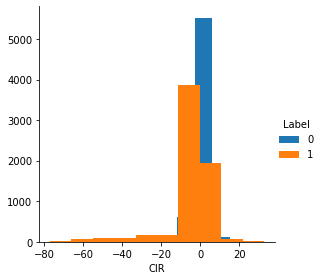

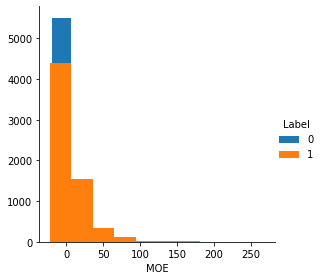

In [13]:
# visualise all feature distributions after normalisation.
for i in df.columns[0:4]:
    sns.FacetGrid(df, hue = 'Label', height = 4).map(plt.hist, i).add_legend()
    plt.grid(False)
    plt.show()
# plt.savefig('books_read.png', transparent = True)

In [14]:
# create two new dataframes based on labels
df_normalised_alert = df_split[df_split["Label"]==0]
df_normalised_drowsy = df_split[df_split["Label"]==1]

In [15]:
df_normalised_alert.describe()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.0
mean,-1.114148,0.348405,-1.016265,2.426901,-11.350358,-0.292324,1.583531,32.333333,0.0
std,9.874432,6.253053,6.496300,9.827736,5.396723,3.149570,9.416338,16.963140,0.0
min,-264.817526,-208.721176,-75.838571,-19.431376,-84.809831,-21.120917,-35.120723,2.000000,0.0
25%,-2.254613,-1.223197,-1.273845,-0.891324,-14.782821,-1.862237,-5.090220,17.000000,0.0
50%,0.082433,0.174717,0.145718,-0.023899,-10.892913,-0.387182,1.248965,34.000000,0.0
75%,1.107218,1.871034,1.155580,2.606994,-7.575725,1.295315,7.879274,50.000000,0.0
max,103.888692,184.692094,15.272632,235.709706,34.842207,25.532045,33.427154,59.000000,0.0


In [16]:
df_normalised_drowsy.describe()

,EAR,MAR,CIR,MOE,PITCH,ROLL,YAW,Subject,Label
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.0
mean,-7.099157,3.468018,-4.124292,10.009002,-8.138030,-0.047372,3.558490,32.333333,1.0
std,17.899604,10.827417,11.261823,19.511272,8.507008,4.639051,9.931154,16.963140,0.0
min,-315.664612,-41.875322,-77.077666,-21.952335,-85.246005,-26.270791,-64.260677,2.000000,1.0
25%,-7.259599,-1.001812,-3.680614,0.838760,-13.026784,-2.339298,-3.009269,17.000000,1.0
50%,-2.340936,2.065839,-1.453586,3.543817,-7.983333,0.103359,3.097460,34.000000,1.0
75%,-0.173233,6.236195,0.161230,9.563593,-2.169844,2.344953,8.871614,50.000000,1.0
max,70.978399,101.403600,32.682321,267.938715,36.700000,30.800000,41.070155,59.000000,1.0


In [17]:
# saving dataframes as csv files
df_normalised_alert.to_csv('normalised_alert.csv',index=False, header = True)
df_normalised_drowsy.to_csv('normalised_drowsy.csv',index=False, header = True)